# **Beta-Lactamase Data**

Chanin Nantasenamat

[Data Professor YouTube channel](https://youtube.com/dataprofessor)

In [1]:
! wget https://github.com/dataprofessor/beta-lactamase/raw/main/beta_lactamase_CHEMBL29.zip

--2021-10-18 23:30:39--  https://github.com/dataprofessor/beta-lactamase/raw/main/beta_lactamase_CHEMBL29.zip
Resolving github.com (github.com)... 140.82.121.4
Connecting to github.com (github.com)|140.82.121.4|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/dataprofessor/beta-lactamase/main/beta_lactamase_CHEMBL29.zip [following]
--2021-10-18 23:30:39--  https://raw.githubusercontent.com/dataprofessor/beta-lactamase/main/beta_lactamase_CHEMBL29.zip
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.111.133, 185.199.108.133, 185.199.109.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.111.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1416390 (1.4M) [application/zip]
Saving to: ‘beta_lactamase_CHEMBL29.zip.3’

beta_lactamase_CHEM 100%[===================>]   1.35M  --.-KB/s    in 0.04s   

2021-10-18 23:30:40 (35.6 MB/s) - ‘beta_lac

In [22]:
! unzip beta_lactamase_CHEMBL29.zip

Archive:  beta_lactamase_CHEMBL29.zip
replace CHEMBL1075063.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: ^C


In [2]:
! ls *.csv | wc -l

136


In [3]:
import zipfile
import pandas as pd

zf = zipfile.ZipFile("beta_lactamase_CHEMBL29.zip", "r")
df = pd.concat( (pd.read_csv( zf.open(f) ) for f in zf.namelist() ) )

In [4]:
df

,molecule_chembl_id,canonical_smiles,standard_relation,standard_value,standard_units,standard_type,pchembl_value,target_pref_name,bao_label
0,CHEMBL1730,CO/N=C(\C(=O)N[C@@H]1C(=O)N2C(C(=O)O)=C(COC(C)...,=,10.0,/mM/s,Kcat/Km,NaN,Gil1,assay format
1,CHEMBL996,CO[C@@]1(NC(=O)Cc2cccs2)C(=O)N2C(C(=O)O)=C(COC...,NaN,NaN,NaN,Kcat/Km,NaN,Gil1,assay format
2,CHEMBL617,CC(=O)OCC1=C(C(=O)O)N2C(=O)[C@@H](NC(=O)Cc3ccc...,=,598.0,/mM/s,Kcat/Km,NaN,Gil1,assay format
3,CHEMBL702,CCN1CCN(C(=O)N[C@@H](C(=O)N[C@@H]2C(=O)N3[C@@H...,=,3400.0,/mM/s,Kcat/Km,NaN,Gil1,assay format
4,CHEMBL1449,CC1(C)S[C@@H]2[C@H](NC(=O)[C@H](C(=O)O)c3ccsc3...,=,10000.0,/mM/s,Kcat/Km,NaN,Gil1,assay format
...,...,...,...,...,...,...,...,...,...
13,CHEMBL561555,COC(=O)CC(N)(CC(=O)OC)C(=O)OCc1ccccc1,NaN,NaN,NaN,Inhibition,NaN,Beta-lactamase VIM-4,single protein format
14,CHEMBL561821,NC(CC(=O)OCc1ccccc1)(CC(=O)OCc1ccccc1)C(=O)OCc...,NaN,NaN,NaN,Inhibition,NaN,Beta-lactamase VIM-4,single protein format
15,CHEMBL561896,COC(=O)CC(CC(=O)OC)(NC(=O)Cc1ccccc1)C(=O)OC,NaN,NaN,NaN,Inhibition,NaN,Beta-lactamase VIM-4,single protein format
16,CHEMBL563044,COC(=O)C(CC(=O)OCc1ccccc1)(CC(=O)OCc1ccccc1)NC...,NaN,NaN,NaN,Inhibition,NaN,Beta-lactamase VIM-4,single protein format


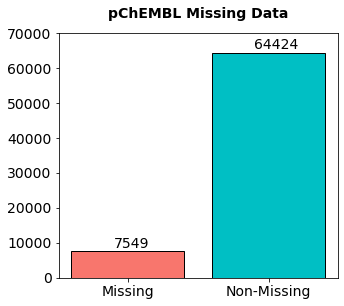

In [5]:
# Bar plot of Missing vs Non-Missing Data

import matplotlib.pyplot as plt

# Data
missing = df.pchembl_value.isnull().sum()
nonmissing = df.pchembl_value.notnull().sum()

x = ['Missing', 'Non-Missing']
y = [missing, nonmissing]

# Setup plot
fig, ax = plt.subplots()

# Make bar plot
p = ax.bar(x, y, color = ['#F8766D', '#00BFC4'], ec = 'black')

ax.set_title('pChEMBL Missing Data', fontsize=14, fontweight='bold', pad=15)
#ax.set_xticklabels(x, fontweight='bold')

ax.set_ylim(0,70000)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

# Label above bar
for index, data in enumerate(y):
    plt.text(x=index-0.1 , y =data+1000 , s=f"{data}" , fontdict=dict(fontsize=14))

fig.set_size_inches(5,4.5)
plt.show()

In [46]:
# Non-missing data with pChEMBL value
df2 = df[df.pchembl_value.notnull()]
df2

,molecule_chembl_id,canonical_smiles,standard_relation,standard_value,standard_units,standard_type,pchembl_value,target_pref_name,bao_label
47,CHEMBL777,O=C(O)[C@H]1/C(=C/CO)O[C@@H]2CC(=O)N21,=,9.0,nM,IC50,8.05,Gil1,assay format
48,CHEMBL404,C[C@]1(Cn2ccnn2)[C@H](C(=O)O)N2C(=O)C[C@H]2S1(...,=,40.0,nM,IC50,7.40,Gil1,assay format
7,CHEMBL777,O=C(O)[C@H]1/C(=C/CO)O[C@@H]2CC(=O)N21,=,70.0,nM,IC50,7.16,Beta-lactamase SCO-1,single protein format
8,CHEMBL403,CC1(C)[C@H](C(=O)O)N2C(=O)C[C@H]2S1(=O)=O,=,6200.0,nM,IC50,5.21,Beta-lactamase SCO-1,single protein format
9,CHEMBL404,C[C@]1(Cn2ccnn2)[C@H](C(=O)O)N2C(=O)C[C@H]2S1(...,=,10.0,nM,IC50,8.00,Beta-lactamase SCO-1,single protein format
...,...,...,...,...,...,...,...,...,...
57,CHEMBL404,C[C@]1(Cn2ccnn2)[C@H](C(=O)O)N2C(=O)C[C@H]2S1(...,=,374.0,nM,IC50,6.43,Carbepenem-hydrolyzing beta-lactamase KPC,assay format
90,CHEMBL404,C[C@]1(Cn2ccnn2)[C@H](C(=O)O)N2C(=O)C[C@H]2S1(...,=,370.0,nM,IC50,6.43,Carbepenem-hydrolyzing beta-lactamase KPC,single protein format
91,CHEMBL777,O=C(O)[C@H]1/C(=C/CO)O[C@@H]2CC(=O)N21,=,10500.0,nM,IC50,4.98,Carbepenem-hydrolyzing beta-lactamase KPC,single protein format
107,CHEMBL777,O=C(O)[C@H]1/C(=C/CO)O[C@@H]2CC(=O)N21,=,11000.0,nM,Ki,4.96,Carbepenem-hydrolyzing beta-lactamase KPC,single protein format


In [47]:
df2_index = df2.groupby('molecule_chembl_id').std().fillna(df.groupby('molecule_chembl_id').last())

In [52]:
df2_index.sort_values

<bound method DataFrame.sort_values of                     standard_value  pchembl_value
molecule_chembl_id                               
CHEMBL1018              316.200000       6.500000
CHEMBL1024            11220.200000       4.950000
CHEMBL1028             2818.400000       5.550000
CHEMBL1036               39.800000       7.400000
CHEMBL104             10606.601718       0.169706
...                            ...            ...
CHEMBL97643           11220.200000       4.950000
CHEMBL977               631.000000       6.200000
CHEMBL98406           63095.700000       4.200000
CHEMBL995             14125.400000       4.850000
CHEMBL996               220.302822       0.368556

[63038 rows x 2 columns]>

In [50]:
df2_std_less_2 = df_group[df_group['pchembl_value'] <2]
df2_std_less_2

,standard_value,pchembl_value
molecule_chembl_id,,
CHEMBL1160008,0.000000,0.000000
CHEMBL122450,168.998521,1.682914
CHEMBL1439,26809.782419,1.453719
CHEMBL1484,0.000000,0.000000
CHEMBL298301,0.000000,0.000000
CHEMBL34034,0.000000,0.000000
CHEMBL34712,0.000000,0.000000
CHEMBL34964,86.500000,0.435000
CHEMBL403,30423.716078,0.860194


# Identify duplicates observations

In [7]:
duplicates = df2.duplicated()

In [42]:
# Identification of 67 observation 
df2[duplicates]

,molecule_chembl_id,canonical_smiles,standard_relation,standard_value,standard_units,standard_type,pchembl_value,target_pref_name,bao_label
18,CHEMBL6461,C[C@]1(/C=C/C#N)[C@H](C(=O)[O-])N2C(=O)C[C@H]2...,=,210.0,nM,IC50,6.68,Beta-lactamase,single protein format
129,CHEMBL3892741,CN(C)c1cc(NC(=O)[C@@H]2CCC3CN2C(=O)N3OS(=O)(=O...,=,1.6,nM,IC50,8.80,Beta-lactamase,single protein format
200,CHEMBL777,O=C(O)[C@H]1/C(=C/CO)O[C@@H]2CC(=O)N21,=,15.0,nM,IC50,7.82,Beta-lactamase AmpC,single protein format
202,CHEMBL338157,NC(=O)c1cccc(NC(=O)N2CC[C@@H]3[C@H]2C(=O)N3S(=...,=,4000.0,nM,IC50,5.40,Beta-lactamase AmpC,single protein format
216,CHEMBL338933,O=C(CNc1ccc(O)cc1)N1CC[C@@H]2[C@H]1C(=O)N2S(=O...,=,79200.0,nM,IC50,4.10,Beta-lactamase AmpC,single protein format
...,...,...,...,...,...,...,...,...,...
351,CHEMBL1795564,CO/N=C(\C(=O)NCP(=O)(O)Oc1ccc(C#N)c(F)c1)c1cnc...,=,3000.0,nM,IC50,5.52,Beta-lactamase,single protein format
359,CHEMBL1795571,N#Cc1ccc(OP(=O)([O-])CNC(=O)/C(=N\OCCC[n+]2ccc...,=,87.0,nM,IC50,7.06,Beta-lactamase,single protein format
361,CHEMBL598776,O=C(N[C@H]1CCCNCC1)N1CC[C@@H]2[C@H]1C(=O)N2S(=...,=,1000.0,nM,IC50,6.00,Beta-lactamase,single protein format
103,CHEMBL777,O=C(O)[C@H]1/C(=C/CO)O[C@@H]2CC(=O)N21,=,170.0,nM,IC50,6.77,Beta-lactamase SHV-1,single protein format


## We group them by chembl ID 
Finally we will get 43 unique observation

In [23]:
df_group = df2[duplicates].groupby('molecule_chembl_id').std().fillna(df.groupby('molecule_chembl_id').last())

In [25]:
len(df_group)

43

In [30]:
len(df_group.index)

43

## Here we will select molecules that show a biological activity with a SDT less than 2

In [38]:
df_duplicates_std_less_2 = df_group[df_group['pchembl_value'] <2]

In [43]:
index_duplicates_std_less_2 = df_duplicates_std_less_2.index
index_duplicates_std_less_2

Index(['CHEMBL1160008', 'CHEMBL122450', 'CHEMBL1439', 'CHEMBL1484',
       'CHEMBL298301', 'CHEMBL34034', 'CHEMBL34712', 'CHEMBL34964',
       'CHEMBL403', 'CHEMBL404', 'CHEMBL429694', 'CHEMBL46666', 'CHEMBL48760',
       'CHEMBL50', 'CHEMBL777'],
      dtype='object', name='molecule_chembl_id')

### Now we need to merge the values molecules with 

In [123]:
df2[duplicates]['standard_value'].sort_values()

327           1.0
129           1.6
200          15.0
325          25.0
355          25.0
           ...   
323       47700.0
322       65900.0
216       79200.0
52532     89125.1
224      100000.0
Name: standard_value, Length: 67, dtype: float64

In [134]:
df2[duplicates].groupby('molecule_chembl_id').std().fillna(df.groupby('molecule_chembl_id').last())

,standard_value,pchembl_value
molecule_chembl_id,,


In [130]:
df2

,molecule_chembl_id,canonical_smiles,standard_relation,standard_value,standard_units,standard_type,pchembl_value,target_pref_name,bao_label
47,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
48,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...
57,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
90,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
91,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
107,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [110]:
df2[duplicates].groupby('molecule_chembl_id').std()

,standard_value,pchembl_value
molecule_chembl_id,,
CHEMBL109227,NaN,NaN
CHEMBL113381,NaN,NaN
CHEMBL1160008,0.000000,0.000000
CHEMBL1160160,NaN,NaN
CHEMBL1173797,NaN,NaN
CHEMBL1221,NaN,NaN
CHEMBL122450,168.998521,1.682914
CHEMBL127782,NaN,NaN
CHEMBL130187,NaN,NaN


In [90]:
df2.groupby('molecule_chembl_id').mean()

,standard_value,pchembl_value
molecule_chembl_id,,
CHEMBL1018,316.200000,6.500000
CHEMBL1024,11220.200000,4.950000
CHEMBL1028,2818.400000,5.550000
CHEMBL1036,39.800000,7.400000
CHEMBL104,27500.000000,4.580000
...,...,...
CHEMBL97643,11220.200000,4.950000
CHEMBL977,631.000000,6.200000
CHEMBL98406,63095.700000,4.200000


In [91]:
df2.groupby('molecule_chembl_id').std()

,standard_value,pchembl_value
molecule_chembl_id,,
CHEMBL1018,NaN,NaN
CHEMBL1024,NaN,NaN
CHEMBL1028,NaN,NaN
CHEMBL1036,NaN,NaN
CHEMBL104,10606.601718,0.169706
...,...,...
CHEMBL97643,NaN,NaN
CHEMBL977,NaN,NaN
CHEMBL98406,NaN,NaN


In [98]:
df3 = df2.groupby('molecule_chembl_id').std()
df3

,standard_value,pchembl_value
molecule_chembl_id,,
CHEMBL1018,NaN,NaN
CHEMBL1024,NaN,NaN
CHEMBL1028,NaN,NaN
CHEMBL1036,NaN,NaN
CHEMBL104,10606.601718,0.169706
...,...,...
CHEMBL97643,NaN,NaN
CHEMBL977,NaN,NaN
CHEMBL98406,NaN,NaN


In [128]:
df3 = df3[(df3['standard_value'] == pd.NA) | (df3['standard_value'].std() < 2)]
df3

AttributeError: 'float' object has no attribute 'fillna'

In [31]:
import numpy as np

df3 = df2.groupby('molecule_chembl_id').std()
df3[df3.pchembl_value == np.nan]

,standard_value,pchembl_value
molecule_chembl_id,,


In [32]:
print('Number of unique ChEMBL ID:', str(len(df.molecule_chembl_id.unique()) )  )
print('Total number of ChEMBL ID: ', str(len(df)) )
print('Number of missing ChEMBL ID: ', str(df.molecule_chembl_id.isnull().sum()) )

Number of unique ChEMBL ID: 64436
Total number of ChEMBL ID:  71973
Number of missing ChEMBL ID:  0


In [33]:
import matplotlib.pyplot as plt

unique = len(df.molecule_chembl_id.unique())
not_unique = len(df) - unique

x = ['Unique', 'Redundant']
y = [unique, not_unique]



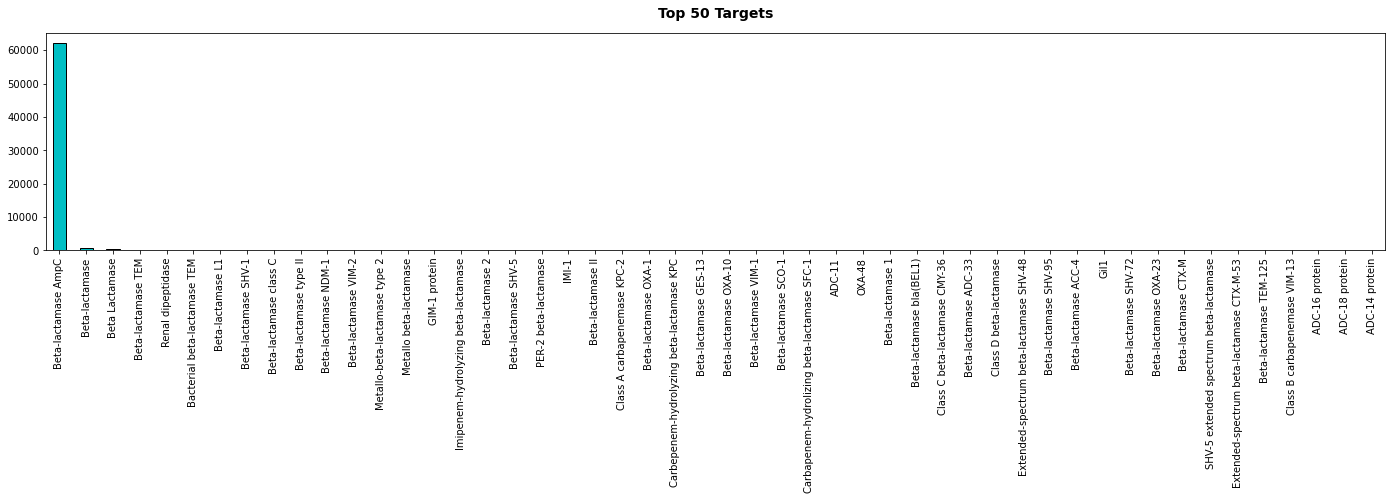

In [34]:
df2.target_pref_name.value_counts()[0:50].plot.bar(figsize=(24,4), color='#00BFC4', ec='black')

plt.title('Top 50 Targets', fontsize=14, fontweight='black', pad=15)
plt.show()

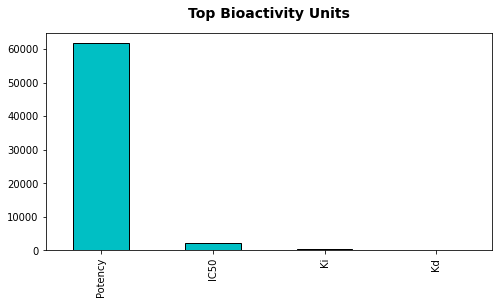

In [14]:
# Top 10 Bioactivity units
df2.standard_type.value_counts()[:10].plot.bar(figsize=(8,4), color='#00BFC4', ec='black')

plt.title('Top Bioactivity Units', fontsize=14, fontweight='black', pad=15)
plt.show()

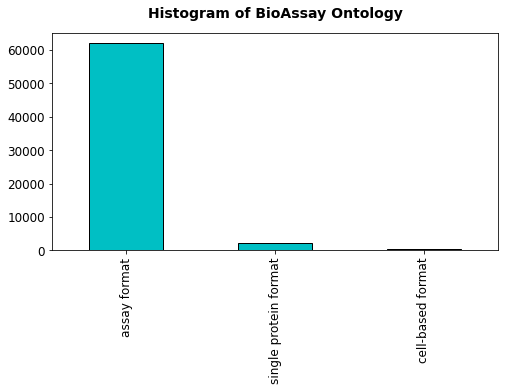

In [15]:
bao_labels = df2.bao_label.value_counts()
bao_labels.plot.bar(figsize=(8,4), color='#00BFC4', ec='black')

plt.title('Histogram of BioAssay Ontology', fontsize=14, fontweight='black', pad=15)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

In [ ]:
bao_labels

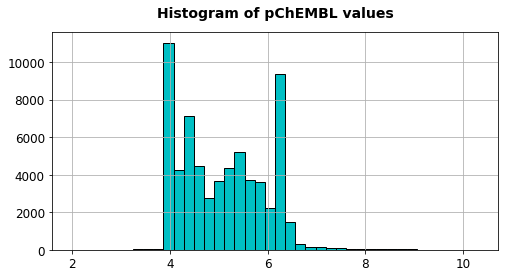

In [16]:
df2.pchembl_value.hist(bins=40, figsize=(8,4), color='#00BFC4', ec='black')

plt.title('Histogram of pChEMBL values', fontsize=14, fontweight='black', pad=15)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

pChEMBL values <5 == 'Inactive'
pChEMBL values > 6 == 'Active'
pChEMBL values 5-6 == 'Intermediate'